In [67]:
import pandas as pd
import numpy as np
import scipy as sp
import nltk
import seaborn as sns
import re
from time import time
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MiniBatchKMeans
from __future__ import unicode_literals
%matplotlib inline

In [2]:
lyrics = pd.read_csv('Lyrics1.csv', encoding='utf-8')

In [3]:
# choose 10 similar bands
lyrics = lyrics[lyrics['Band'].str.match('Weezer|The Black Keys|Green Day|Arctic Monkeys|Black Rebel Motorcycle Club|Foo Fighters|Red Hot Chili Peppers|Smashing Pumpkins|Muse|blink-182')]

In [4]:
# find the lowest number of songs
lyrics.groupby('Band').count()

,Lyrics,Song
Band,,
Arctic Monkeys,79,79
Black Rebel Motorcycle Club,104,104
Foo Fighters,83,83
Green Day,243,243
Muse,144,144
Red Hot Chili Peppers,200,200
Smashing Pumpkins,203,203
The Black Keys,41,41
Weezer,60,60


In [5]:
# take a sample of the other artists equal to the band with the lowest number of songs
# lyrics = lyrics.groupby('Band').apply(lambda x: x.sample(41)).reset_index(drop=True)

In [6]:
import spacy
# We want to use the standard english-language parser.
nlp = spacy.load('en')

weezer = lyrics.Lyrics[lyrics.Band == 'Weezer']
weezer = weezer.sample(n=30)
weezer = ' '.join(weezer.tolist())

# Parsing
weezer = nlp(weezer)

In [27]:
gd = lyrics.Lyrics[lyrics.Band == 'Green Day']
gd = gd.sample(n=30)
gd = ' '.join(gd.tolist())
gd = nlp(gd)

In [8]:
am = lyrics.Lyrics[lyrics.Band == 'Arctic Monkeys']
am = am.sample(n=30)
am = ' '.join(am.tolist())
am = nlp(am)

In [9]:
brmc = lyrics.Lyrics[lyrics.Band == 'Black Rebel Motorcycle Club']
brmc = brmc.sample(n=30)
brmc = ' '.join(brmc.tolist())
brmc = nlp(brmc)

In [10]:
ff = lyrics.Lyrics[lyrics.Band == 'Foo Fighters']
ff = ff.sample(n=30)
ff = ' '.join(ff.tolist())
ff = nlp(ff)

In [11]:
muse = lyrics.Lyrics[lyrics.Band == 'Muse']
muse = muse.sample(n=30)
muse = ' '.join(muse.tolist())
muse = nlp(muse)

In [12]:
rhcp = lyrics.Lyrics[lyrics.Band == 'Red Hot Chili Peppers']
rhcp = rhcp.sample(n=30)
rhcp = ' '.join(rhcp.tolist())
rhcp = nlp(rhcp)

In [13]:
sp = lyrics.Lyrics[lyrics.Band == 'Smashing Pumpkins']
sp = sp.sample(n=30)
sp = ' '.join(sp.tolist())
sp = nlp(sp)

In [14]:
tbk = lyrics.Lyrics[lyrics.Band == 'The Black Keys']
tbk = tbk.sample(n=30)
tbk = ' '.join(tbk.tolist())
tbk = nlp(tbk)

In [15]:
blink = lyrics.Lyrics[lyrics.Band == 'blink-182']
blink = blink.sample(n=30)
blink = ' '.join(blink.tolist())
blink = nlp(blink)

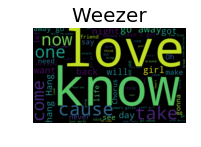

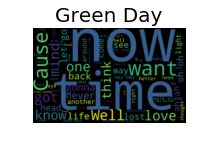

In [96]:
weezer2 = lyrics.Lyrics[lyrics.Band == 'Weezer']
text = ' '.join(weezer.tolist())
wordcloud = WordCloud(width=800, height=500, margin=0, stopwords=None, max_words=70).generate(text)

# Display the generated image:
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Weezer", fontsize=20)
plt.show()

gd2 = lyrics.Lyrics[lyrics.Band == 'Green Day']
text = ' '.join(gd2.tolist())
wordcloud = WordCloud(width=800, height=500, margin=0, stopwords=None, max_words=70).generate(text)


# Display the generated image:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Green Day", fontsize=20)
plt.show()

In [20]:
# define X and y
X = lyrics['Lyrics']
y = lyrics['Band']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
vect_tfidf = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half of texts
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #adds 1 to all document frequencies
                            )
X_train_dtm = vect_tfidf.fit_transform(X_train)
X_test_dtm = vect_tfidf.fit_transform(X_test)

In [22]:
print (X_train_dtm.shape)
print (X_test_dtm.shape)

(976, 4100)
(326, 1920)


In [23]:
logreg = LogisticRegression()
print ('Accuracy: ', cross_val_score(logreg, X_train_dtm, y_train, cv=5, scoring='accuracy').mean())

Accuracy:  0.4239561568555598


In [24]:
rfc = ensemble.RandomForestClassifier()
print ('Accuracy: ', cross_val_score(rfc, X_train_dtm, y_train, cv=5, scoring='accuracy').mean())

Accuracy:  0.39033913942589155


In [25]:
clf = ensemble.GradientBoostingClassifier()
print ('Accuracy: ', cross_val_score(clf, X_train_dtm, y_train, cv=5, scoring='accuracy').mean())

Accuracy:  0.38471700835568756


In [26]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [27]:
print ('Accuracy: ', cross_val_score(logreg, X_train_dtm, y_train, cv=5, scoring='accuracy').mean())

Accuracy:  0.5065080403290583


In [28]:
print ('Accuracy: ', cross_val_score(rfc, X_train_dtm, y_train, cv=5, scoring='accuracy').mean())

Accuracy:  0.38819928866751674


In [29]:
print ('Accuracy: ', cross_val_score(clf, X_train_dtm, y_train, cv=5, scoring='accuracy').mean())

Accuracy:  0.4231130951883415
